# **California Housing Price Prediction**

This work contains dataset information from the 1990 California sensus sourced originally from the article written by R. Kelley Pace and Ronald Barry for [Statistics & Probability Letters, Vol. 33, 1997](https://www.sciencedirect.com/science/article/abs/pii/S016771529600140X).

# Business Problem Understanding

## Context

Housing is a primary necessity, but not everyone knows the exact price of a house that matches the features offered. If a developer sets a price too low compared to their competitors, the house may sell quickly but the profit will not be optimal. Conversely, if the price is too high, the house may be difficult to sell due to low buyer interest, and preferences may shift to other similar, more affordable houses.

## Problem Statement

The challenge for developers is determining the right house price based on the location and features offered, while remaining competitive with competitors selling similar types of house. Developers certainly do not want to sell houses at unreasonable prices, taking into account features such as the number of rooms, location, and condition of the house.

## Goals

Modeling is necessary to determine accurate house prices using Machine Learning algorithms by analyzing which features influence house prices in California.

## Analytical Approach

Data analysis is required to identify patterns in features to differentiate between houses. A regression model is buiilt as a predictive tool to assist developers in determining appropriate house selling prices.

## Evaluation Metrics

The evaluation metrics to be used include:
1. R-Squared.
2. MAE (Mean Absolute Error).
3. RMSE (Root Mean Squared Error).
4. MAPE (Mean Absolute Percentage Error).

# Data Understanding

The dataset information is based on census data from California in 1990.

| No. | **Attribute** | **Description** |
| - | - | - |
| 1. | **longitude** | A measure of how far west a house is; a higher value is farther west. |
| 2. | **latitude** | A measure of how far north a house is; a higher value is farther north. |
| 3. | **housing_median_age** | Median age of a house within a block; a lower number is a newer building. |
| 4. | **total_rooms** | Total number of rooms within a block. |
| 5. | **total_bedrooms** | Total number of bedrooms within a block. |
| 6. | **population** | Total number of people residing within a block. |
| 7. | **households** | Total number of households, a group of people residing within a home unit, for a block. |
| 8. | **median_income** | Median income for households within a block of houses (measured in tens of thousands of US Dollars). | 
| 9. | **median_house_value** | Median house value for households within a block (measured in US Dollars). |
| 10. | **ocean_proximity** | Location of the house w.r.t ocean/sea. |

In [16]:
# libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [17]:
raw_data = pd.read_csv("data_california_house.csv")
display(raw_data.head(), raw_data.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


## Column Information

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


There are no features with incorrect data types; however, there are missing values in the total_bedrooms column.

## Statistical Description

In [22]:
display(raw_data.describe(), raw_data.describe(include="object").drop(index="top"))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
freq,6369


Based on the descriptive view, there is no abnormal data, such as house prices being zero or negative.

## Exploratory Data Analysis

### Distribution of median_house_value

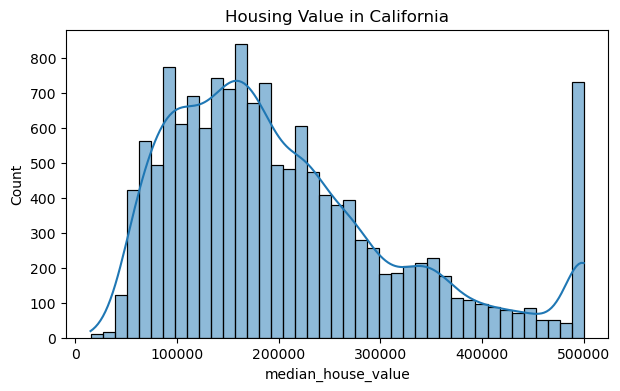

In [26]:
plt.figure(figsize=(7,4))
sns.histplot(raw_data["median_house_value"], kde=True)
plt.title("Housing Value in California")
plt.show()

Based on the histogram, the house price distribution exhibits a right-skewed distribution, meaning there is positive skewness in the median_house_value feature. This indicates an imbalance in the target data.

### Distribution of median_house_value based on Location

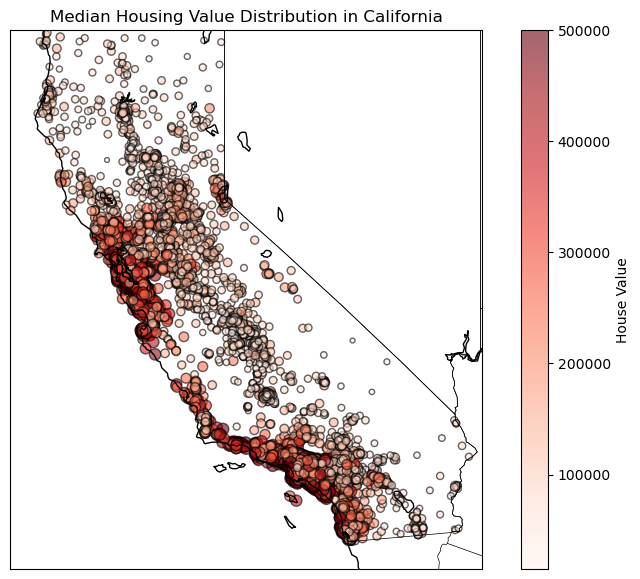

In [29]:
plt.figure(figsize=(10,7))

# basemap
map_house_value = Basemap(
    projection="merc", 
    llcrnrlat=32, urcrnrlat=42,  # latitude boundary
    llcrnrlon=-125, urcrnrlon=-114,  # longitude boundary
    resolution="i"
)
map_house_value.drawcoastlines()
map_house_value.drawcountries()
map_house_value.drawstates()

x, y = map_house_value(raw_data["longitude"].values, raw_data["latitude"].values)

colors = raw_data["median_house_value"]
sizes = np.sqrt(raw_data["median_house_value"]) / 10  # Atur ukuran bubble

# scatterplot
scatter = map_house_value.scatter(
    x, y, 
    c=colors, 
    s=sizes, 
    cmap="Reds", 
    alpha=0.6, 
    edgecolor="k", 
    marker="o"
)

plt.colorbar(scatter, label="House Value")
plt.title("Median Housing Value Distribution in California")
plt.show()

Based on the data distribution, it can be observed that house prices are influenced by location, with coastal areas tending to have higher prices.

### Distribution of population and households based on Location

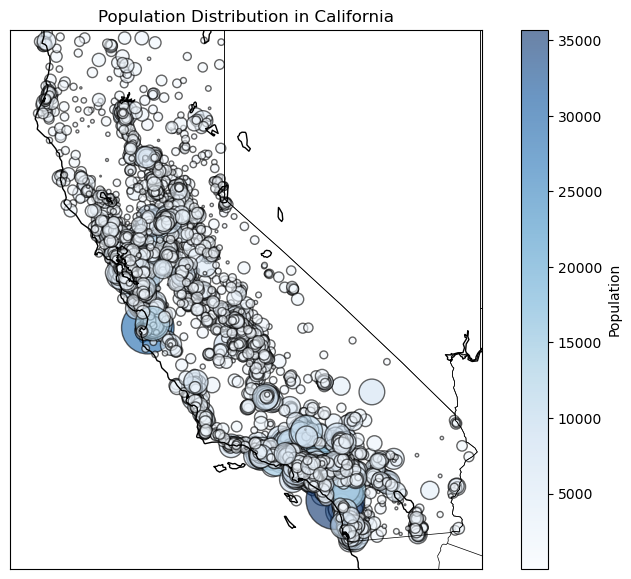

In [32]:
plt.figure(figsize=(10,7))

map_population = Basemap(
    projection="merc",
    llcrnrlat=32, urcrnrlat=42,
    llcrnrlon=-125, urcrnrlon=-114,
    resolution="i"
)
map_population.drawcoastlines()
map_population.drawstates()
map_population.drawcountries()

x, y = map_population(raw_data["longitude"].values, raw_data["latitude"].values)

size_scale = 0.05
scatter = map_population.scatter(
    x, y,
    c=raw_data["population"],
    s=raw_data["population"] * size_scale,
    cmap="Blues",
    alpha=0.6,
    edgecolor="k",
    marker="o")

plt.colorbar(scatter, label="Population")
plt.title("Population Distribution in California")
plt.show()

In [33]:
raw_data.groupby("ocean_proximity").size().reset_index(name="count")

,ocean_proximity,count
0,<1H OCEAN,6369
1,INLAND,4576
2,ISLAND,2
3,NEAR BAY,1622
4,NEAR OCEAN,1879


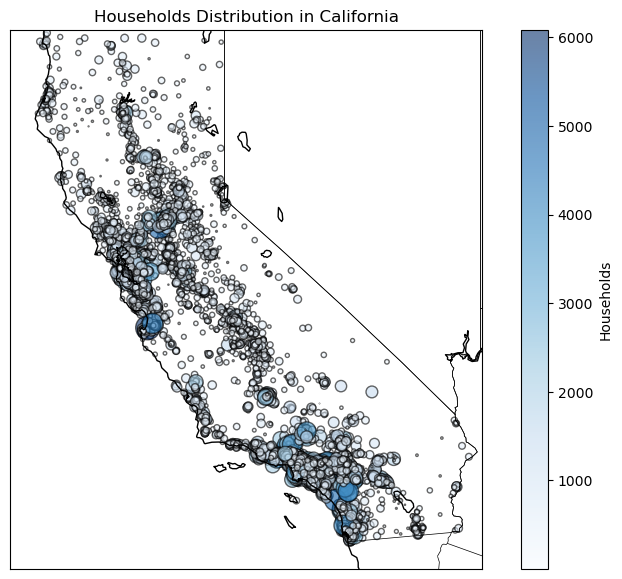

In [34]:
plt.figure(figsize=(10,7))

map_population = Basemap(
    projection="merc",
    llcrnrlat=32, urcrnrlat=42,
    llcrnrlon=-125, urcrnrlon=-114,
    resolution="i"
)
map_population.drawcoastlines()
map_population.drawstates()
map_population.drawcountries()

x, y = map_population(raw_data["longitude"].values, raw_data["latitude"].values)

size_scale = 0.05
scatter = map_population.scatter(
    x, y,
    c=raw_data["households"],
    s=raw_data["households"] * size_scale,
    cmap="Blues",
    alpha=0.6,
    edgecolor="k",
    marker="o")

plt.colorbar(scatter, label="Households")
plt.title("Households Distribution in California")
plt.show()

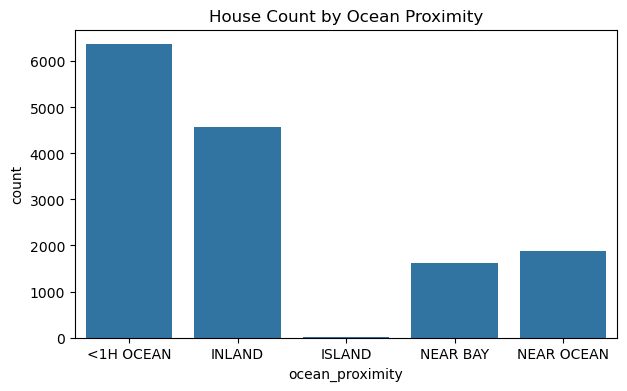

In [35]:
count_by_location = raw_data.groupby("ocean_proximity").size().reset_index(name="count")

plt.figure(figsize=(7,4))
sns.barplot(x="ocean_proximity", y="count", data=count_by_location)
plt.title("House Count by Ocean Proximity")
plt.show()

The population is mostly concentrated in areas not far from the coast. This suggests that there may be a preference among California residents for living in those areas.

### Distribution of house_median_age

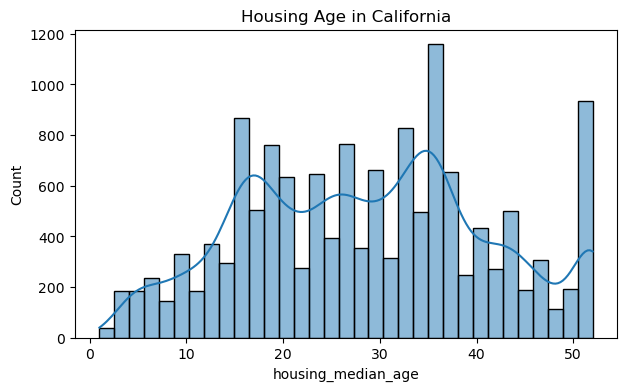

In [38]:
plt.figure(figsize=(7,4))
sns.histplot(raw_data["housing_median_age"], kde=True)
plt.title("Housing Age in California")
plt.show()

Based on the histogram, the age distribution of the median house is multi-modal, meaning the data has more than one peak with several subgroups or distinct characteristics. This indicates that there are differences in location characteristics based on the age of the houses.

### Distribution of total_rooms, total_bedrooms, median_income

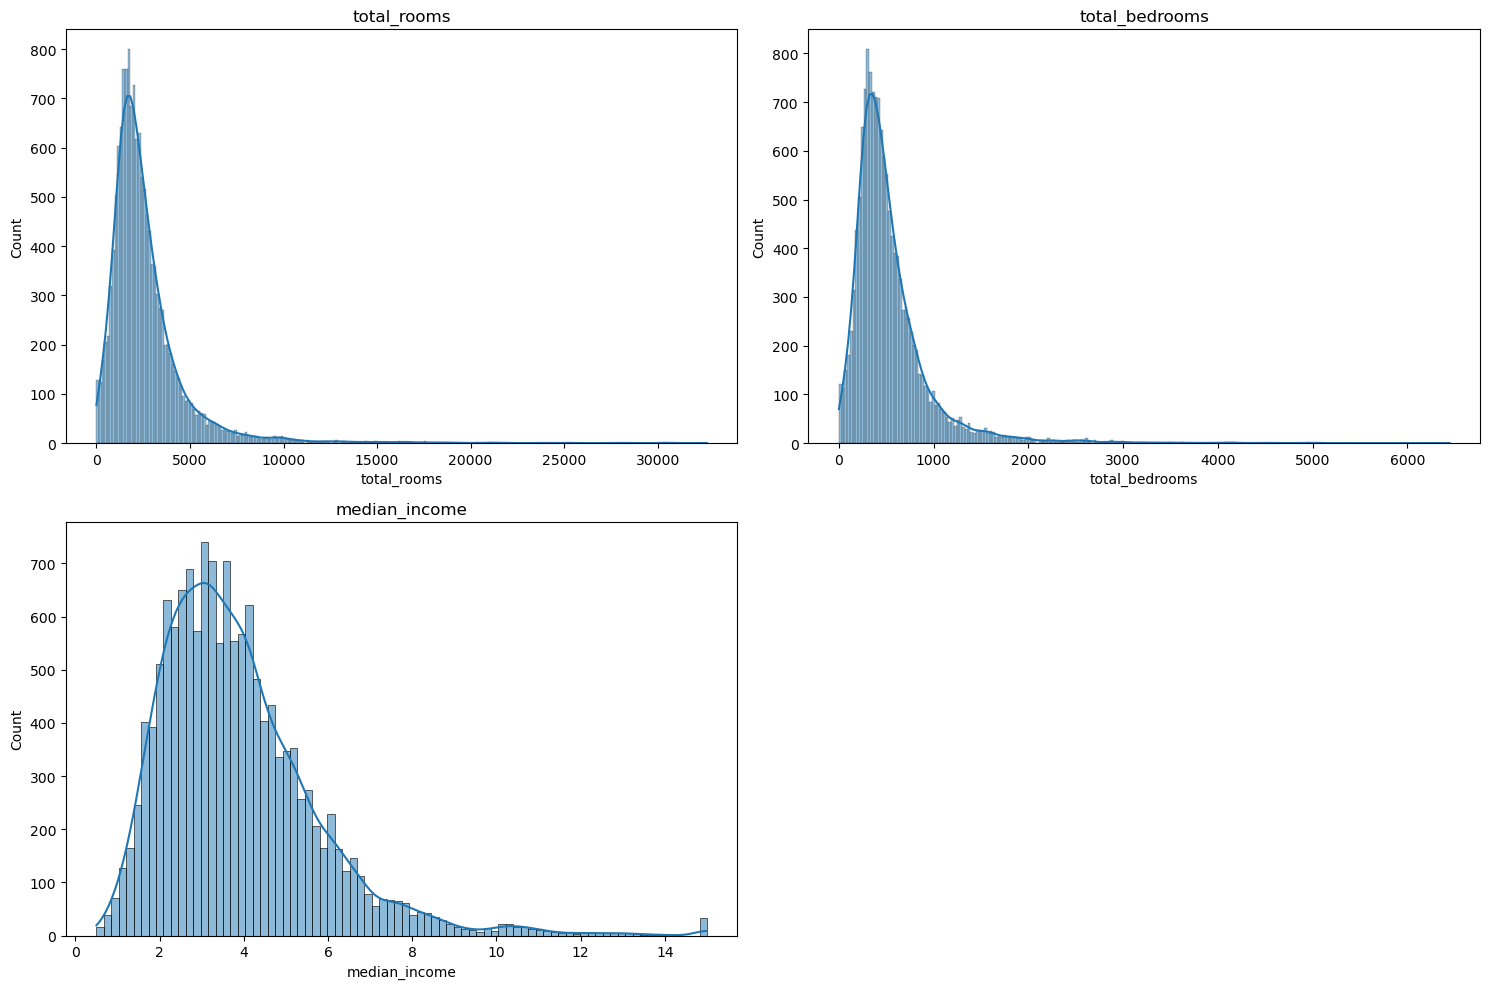

In [41]:
# columns to plot
columns = ["total_rooms", "total_bedrooms", "median_income"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(raw_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Based on the histogram, the data for all three features is not normally distributed, with total_rooms, total_bedrooms, and median_income exhibiting a right-skewed distribution.

## Data Correlation

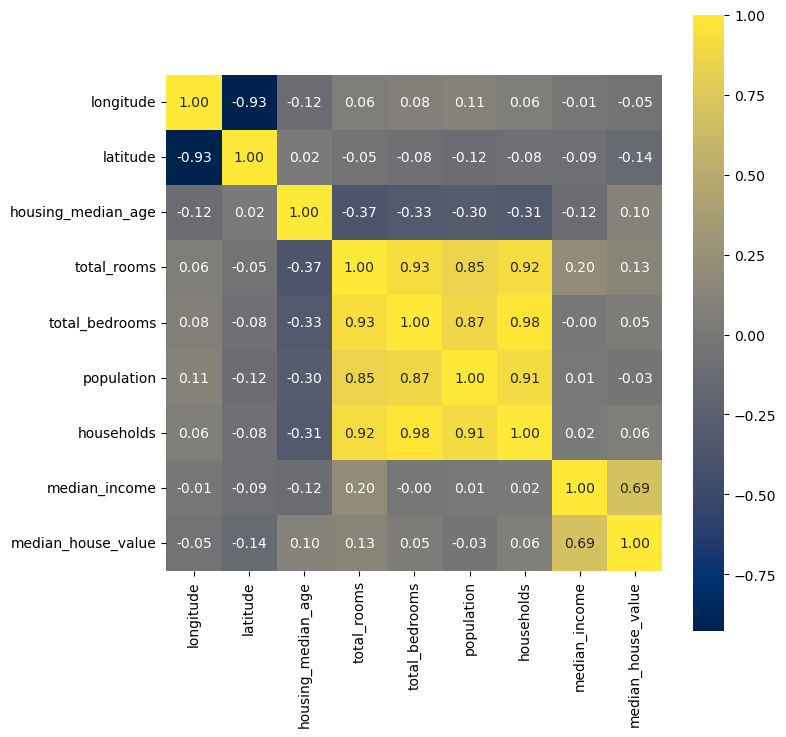

In [44]:
numeric_df = raw_data.select_dtypes(include=["number"])

plt.figure(figsize=(8,8))
corr = numeric_df.corr(method="pearson")
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap="cividis")
plt.show()

1. The feature with the strongest correlation to the target median_house_value is median_income, which shows a positive correlation. This means that as median_income increases, median_house_value tends to increase as well.
2. There is a strong correlation between the features longitude and latitude, as well as between total_rooms, total_bedrooms, population, and households. Feature engineering or feature selection should be performed to avoid multicollinearity.

# Data Preprocessing

In [47]:
df = raw_data.copy()

## Drop Columns

Based on domain knowledge, it was decided to remove the total_bedrooms feature as it is part of the information provided by total_rooms. Additionally, the correlation of total_rooms with the target is higher, at 0.13, compared to total_bedrooms, which has a correlation of 0.05.

In [50]:
df.drop(columns=["total_bedrooms"], inplace=True)

## Missing Value

In [52]:
missing_values = df.isna().sum()
df_missing = pd.DataFrame(missing_values).reset_index()
df_missing.columns = ["Column", "Total Missing Value"]
df_missing["Percentage"] = (df_missing["Total Missing Value"] / len(df)) * 100
df_missing

,Column,Total Missing Value,Percentage
0,longitude,0,0.0
1,latitude,0,0.0
2,housing_median_age,0,0.0
3,total_rooms,0,0.0
4,population,0,0.0
5,households,0,0.0
6,median_income,0,0.0
7,ocean_proximity,0,0.0
8,median_house_value,0,0.0


There are no missing values, so no handling is needed.

## Duplicated Data

In [55]:
df.duplicated().sum()

0

There are no duplicate data, so no handling is needed.

## Outlier

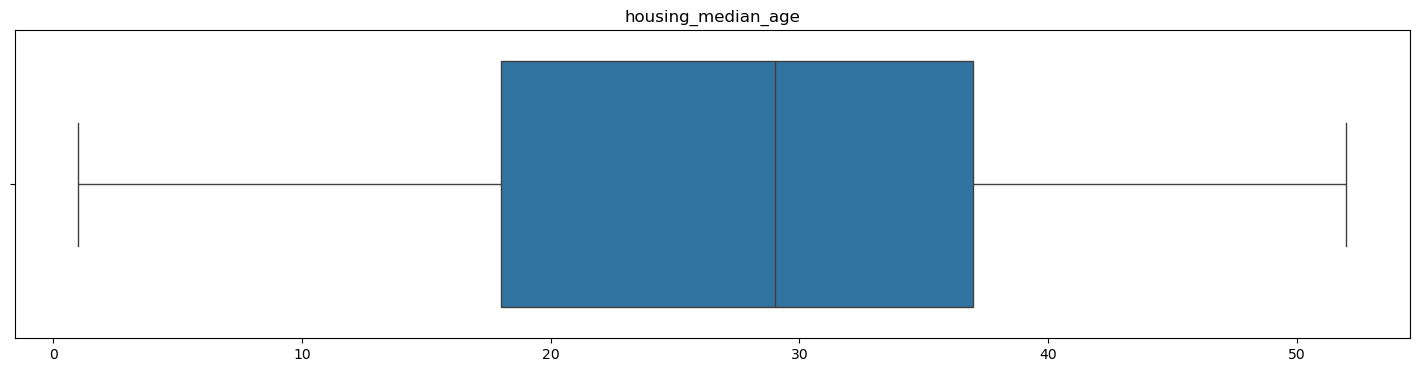

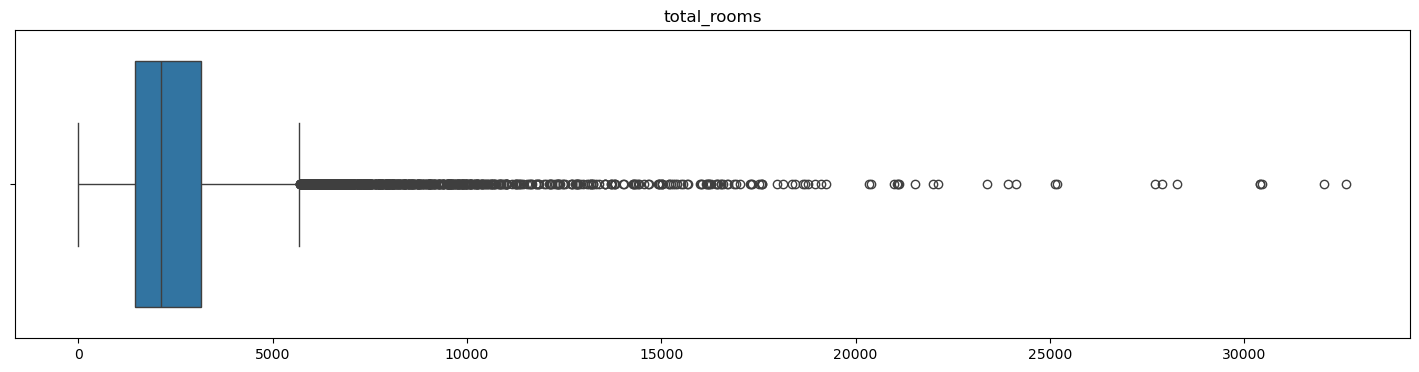

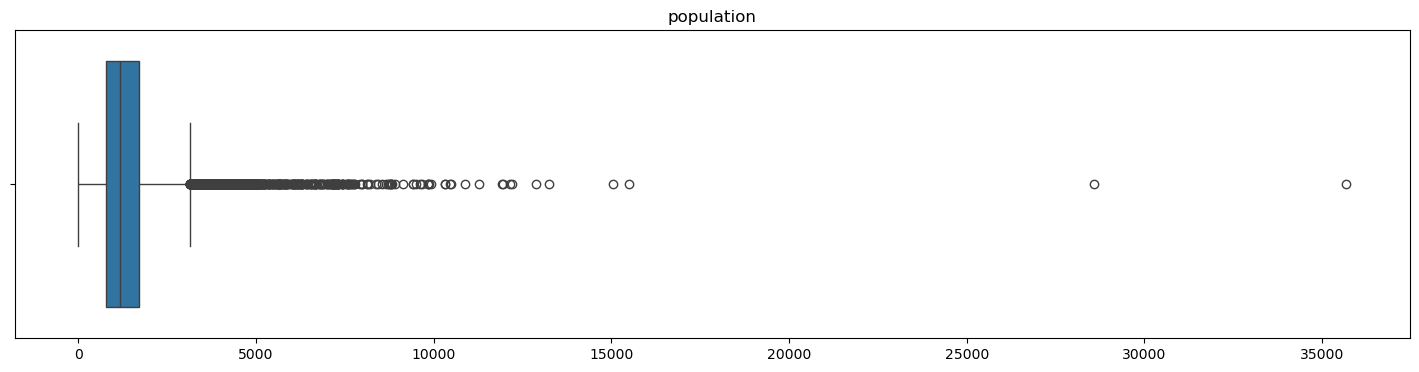

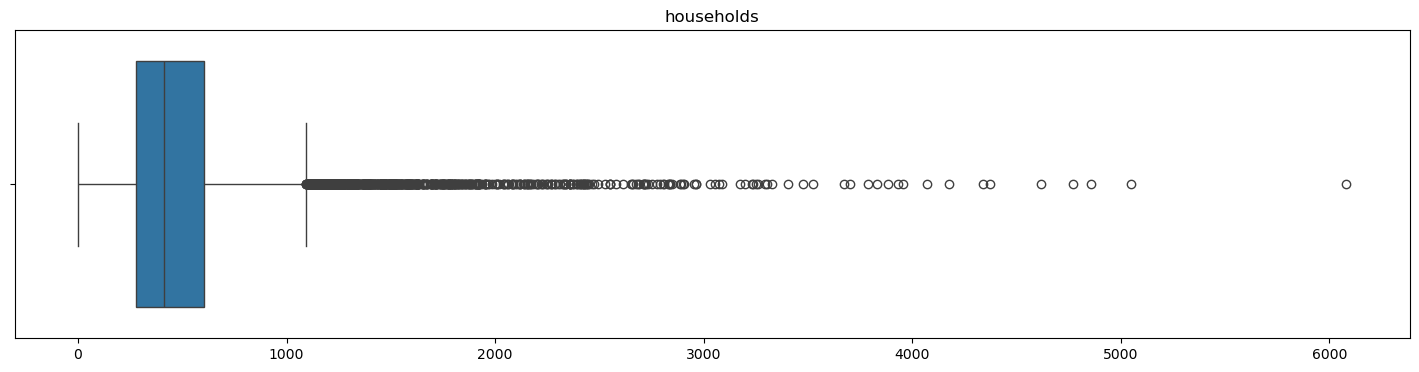

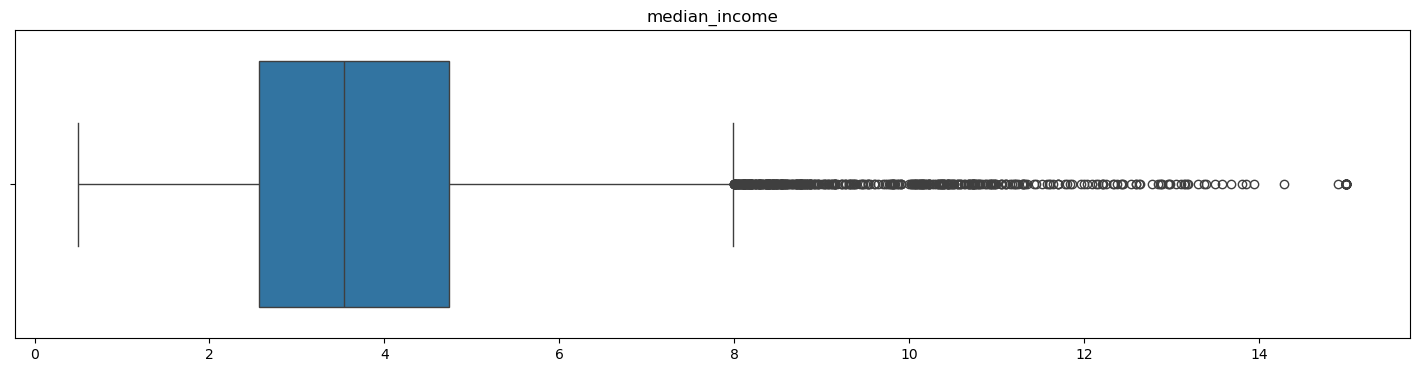

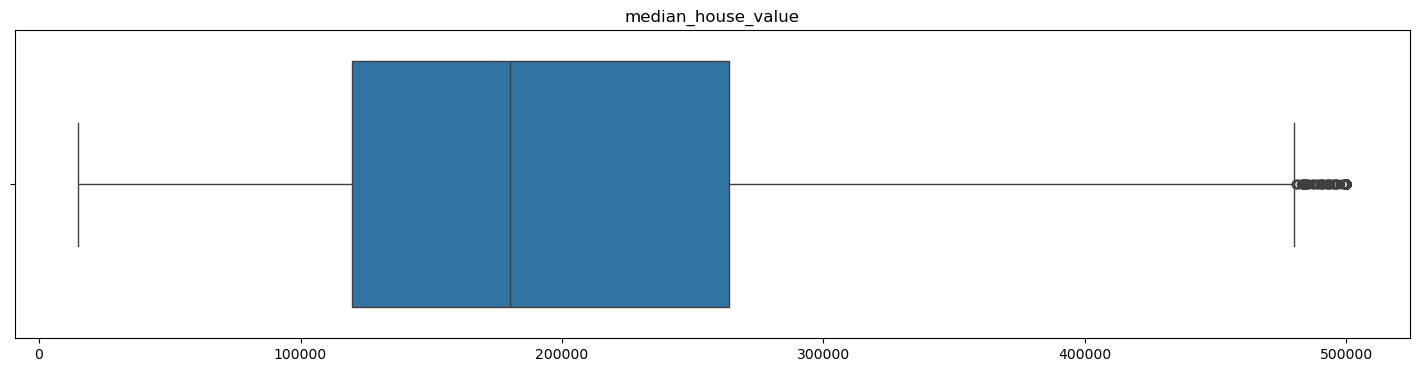

In [58]:
# looping boxplot to seek for outlier
column_to_handle = df.drop(columns=["longitude", "latitude"])
numerical_column = column_to_handle.select_dtypes(include=["number"]).columns
for index, col in enumerate(numerical_column):
    plt.figure(figsize=(18,4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

plt.show()

In [59]:
# identify lower and upper bound of each column's outlier
outlier_dict = {
    "Lower Bound": [],
    "Upper Bound": [],
    "Total Outlier": [],
    "Percentage of All": []
}

# iterate
for col in numerical_column: # numerical_column has been previously assigned
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    floor = Q1 - 1.5 * IQR
    ceiling = Q3 + 1.5 * IQR
    
    total_outlier = len(df[(df[col] < floor) | (df[col] > ceiling)])
    outlier_percentage = total_outlier / len(df) * 100

    # append
    outlier_dict["Lower Bound"].append(round(floor, 2))
    outlier_dict["Upper Bound"].append(round(ceiling, 2))
    outlier_dict["Total Outlier"].append(total_outlier)
    outlier_dict["Percentage of All"].append(round(outlier_percentage, 2))

pd.DataFrame(outlier_dict, index=numerical_column)

,Lower Bound,Upper Bound,Total Outlier,Percentage of All
housing_median_age,-10.50,65.50,0,0.00
total_rooms,-1094.50,5693.50,900,6.23
population,-626.00,3134.00,827,5.72
households,-208.50,1091.50,842,5.83
median_income,-0.68,7.98,482,3.34
median_house_value,-96850.00,480350.00,757,5.24


In [60]:
df_outliers = []

for col, upper_bound in zip(numerical_column, outlier_dict["Upper Bound"]):
    outlier = df[df[col] > upper_bound]
    df_outliers.append(outlier)

df_outliers = pd.concat(df_outliers)
df_outliers_unique = df_outliers.drop_duplicates()

display(df_outliers_unique)
outliers_percentage = len(df_outliers_unique) / len(df) * 100
print(f"Total outliers: {round(outliers_percentage, 2)} percent.")

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value
5,-117.79,33.80,11.0,10535.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
9,-122.27,37.97,10.0,15259.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0
13,-117.50,33.96,12.0,7923.0,4861.0,1385.0,4.2985,INLAND,139200.0
22,-121.53,38.61,5.0,8149.0,2933.0,1616.0,3.6788,INLAND,178800.0
45,-117.59,33.91,7.0,10223.0,5205.0,1509.0,5.4872,INLAND,203400.0
...,...,...,...,...,...,...,...,...,...
14325,-118.44,34.07,26.0,3535.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0
14411,-117.31,33.00,30.0,1631.0,665.0,297.0,6.8443,NEAR OCEAN,492500.0


Total outliers: 14.29 percent.


Based on the outlier check, it was found that the total outliers account for 14.29% of the total data. Removing all outliers would result in a significant loss of data. Therefore, it was decided to remove only a few critical outliers, such as those with values significantly higher than the others, so that the distribution becomes more representative.

### Outlier total_rooms

Outliers in the total_rooms feature were removed using the IQR (Interquartile Range) calculation, with the consideration that the total number of rooms was excessively large.

In [64]:
df = df[~(df["total_rooms"] > outlier_dict["Upper Bound"][1])]

### Outlier population and households

In [66]:
df.sort_values(by="population", ascending=False).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value
7509,-118.59,34.47,5.0,538.0,8733.0,105.0,4.2391,INLAND,154600.0
8681,-118.30,34.07,46.0,5677.0,7443.0,2406.0,1.8238,<1H OCEAN,237500.0
9741,-122.17,37.43,24.0,3924.0,7174.0,950.0,4.0972,NEAR OCEAN,387500.0
8868,-117.87,33.75,14.0,5526.0,6799.0,1796.0,2.6561,<1H OCEAN,144400.0
5419,-121.15,38.69,52.0,240.0,6675.0,29.0,6.1359,INLAND,225000.0


In [67]:
df.sort_values(by="households", ascending=False).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value
8681,-118.30,34.07,46.0,5677.0,7443.0,2406.0,1.8238,<1H OCEAN,237500.0
2937,-118.30,34.07,28.0,5221.0,5840.0,2374.0,1.8829,<1H OCEAN,300000.0
10613,-122.26,37.80,36.0,5329.0,3469.0,2323.0,2.0096,NEAR BAY,130000.0
6338,-118.30,34.10,37.0,5305.0,3895.0,1874.0,2.0672,<1H OCEAN,283300.0
1987,-118.31,34.07,26.0,5062.0,4533.0,1822.0,2.3105,<1H OCEAN,166700.0


Outliers in the population and households features were not removed, as they may represent areas with either high or low population density. It is possible that the population size in an area influences the determination of house prices.

### Outlier median_income

Outliers in the median_income feature were retained because its correlation with the target is quite high, which can help the model make more accurate predictions. Additionally, considering economic factors, income often plays a significant role in determining purchasing power when it comes to home buying.

### Outlier median_house_value

In [72]:
df.sort_values(by="median_house_value", ascending=False).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value
1421,-118.12,34.12,52.0,2907.0,956.0,279.0,15.0001,<1H OCEAN,500001.0
11223,-117.88,33.60,31.0,5488.0,1938.0,964.0,8.8742,<1H OCEAN,500001.0
2999,-117.86,33.62,23.0,3166.0,1092.0,345.0,7.9367,<1H OCEAN,500001.0
7847,-117.23,32.72,38.0,2827.0,972.0,558.0,3.2361,NEAR OCEAN,500001.0
10604,-122.44,37.80,52.0,1580.0,714.0,448.0,3.2447,NEAR BAY,500001.0


In [73]:
len(df[df["median_house_value"] == 500001])

618

In [74]:
group_house_value = df.groupby("median_house_value").size().reset_index(name="count")
group_house_value.sort_values(by="count", ascending=False).head(7)

,median_house_value,count
3452,500001.0,618
928,137500.0,85
1175,162500.0,78
1782,225000.0,69
1422,187500.0,68
683,112500.0,65
2813,350000.0,56


The outlier in the median_house_value feature was removed at the value of 500,001 due to its extreme nature compared to the overall data distribution.

In [76]:
df = df[~(df["median_house_value"] >= 500001)]

## Feature Engineering

In [78]:
df_fe = df.copy()

### Encoding ocean_proximity

Since machine learning models only accept numerical variables, one-hot encoding was applied to the categorical features. One of the dummy variables will be removed to serve as the reference category, preventing the dummy variable trap<sup>1</sup>.

<sub>1. Gujarati, D. N. and Porter, D. C. (2009). Basic Econometrics. 5th ed. New York: Mc-Graw-Hill/Irwin.</sub>

In [81]:
encoded_ocean = pd.get_dummies(df_fe["ocean_proximity"], prefix="op", drop_first=True).astype(int)
encoded_ocean.columns = encoded_ocean.columns.str.replace(" ", "_").str.lower()

df_fe = pd.concat([df_fe, encoded_ocean], axis=1)
df_fe.drop(columns=["ocean_proximity"], inplace=True)

df_fe.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,op_inland,op_island,op_near_bay,op_near_ocean
0,-119.79,36.73,52.0,112.0,193.0,40.0,1.9750,47500.0,1,0,0,0
1,-122.21,37.77,43.0,1017.0,836.0,277.0,2.2604,100000.0,0,0,1,0
2,-118.04,33.87,17.0,2358.0,1387.0,364.0,6.2990,285800.0,0,0,0,0
3,-118.28,34.06,17.0,2518.0,3051.0,1000.0,1.7199,175000.0,0,0,0,0
4,-119.81,36.73,50.0,772.0,606.0,167.0,2.2206,59200.0,1,0,0,0


### Combining Location

The high correlation between longitude and latitude may lead to redundant information, so it was decided to combine both features into a single feature representing the distance to the city center. The city center chosen is San Francisco due to the following considerations:
1. It is located on the West Coast, representing coastal areas.
2. It is a metropolitan area, serving as an economic hub.
3. It attracts population due to urbanization.

In [84]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6378  # equatorial radius
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

center_lat = 37.7749  # san francisco's coordinates
center_lon = -122.4194

df_fe["distance_to_sf"] = df_fe.apply(lambda row: haversine(row["latitude"], row["longitude"], center_lat, center_lon), axis=1)

In [85]:
# remove longitude and latitude columns
df_fe.drop(columns=["longitude", "latitude"], inplace=True)

### Population per Household

The average household ratio was calculated, taking into account the high correlation between the population and households features.

In [88]:
df_fe["household_density"] = df_fe["population"] / df_fe["households"]

In [89]:
# remove population and households columns
df_fe.drop(columns=["population", "households"], inplace=True)

In [90]:
column_order = ["op_inland", "op_island", "op_near_bay", "op_near_ocean", "housing_median_age",
                "total_rooms", "median_income", "distance_to_sf", "household_density",
                "median_house_value"]
df_fe = df_fe[column_order]

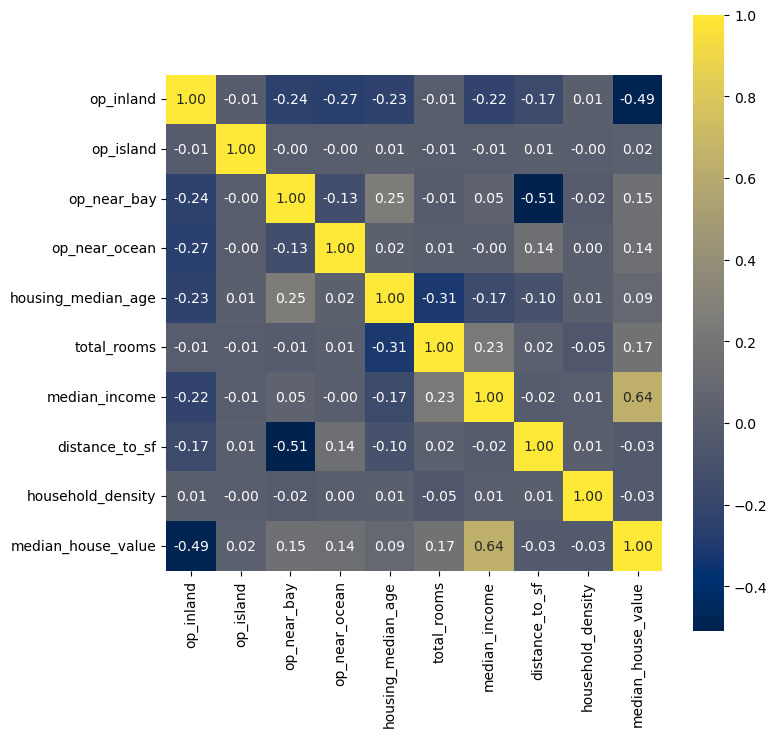

In [91]:
# checking for correlation again
numeric_df3 = df_fe.select_dtypes(include=["number"])

plt.figure(figsize=(8,8))
corr3 = numeric_df3.corr(method="pearson")
sns.heatmap(corr3, annot=True, fmt=".2f", square=True, cmap="cividis")
plt.show()

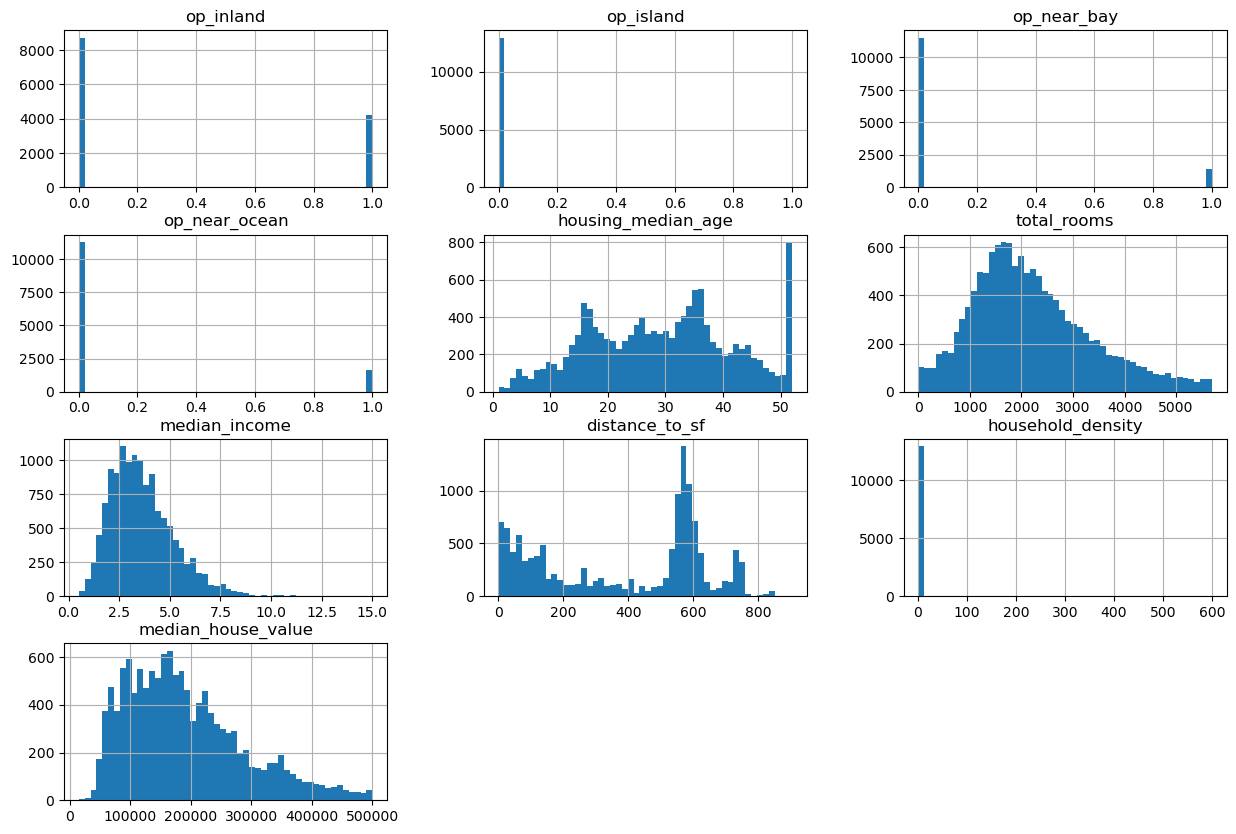

In [92]:
df_fe.hist(bins=50, figsize=(15,10))
plt.show()

Both the feature and target distributions are skewed, so a logarithmic transformation is necessary to normalize the data.

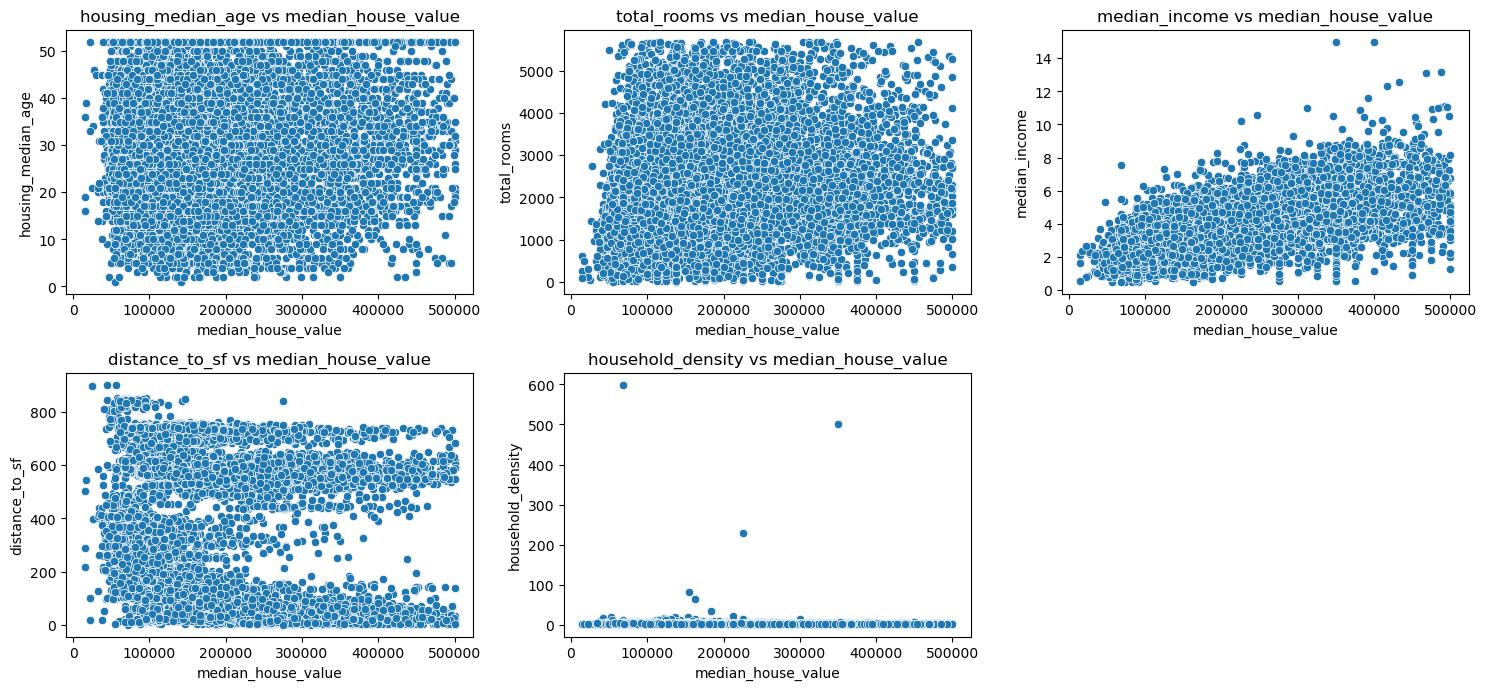

In [94]:
features = df_fe[["housing_median_age", "total_rooms", "median_income", "distance_to_sf", "household_density"]]
target = df_fe["median_house_value"]

# Plot scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features.columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=target, y=df_fe[feature])
    plt.title(f"{feature} vs median_house_value")
plt.tight_layout()
plt.show()

The relationship between several features and the target does not show a linear pattern, so it was decided to apply polynomial transformation to the model.

## Clean Dataset

In [97]:
df_fe.head()

,op_inland,op_island,op_near_bay,op_near_ocean,housing_median_age,total_rooms,median_income,distance_to_sf,household_density,median_house_value
0,1,0,0,0,52.0,112.0,1.9750,260.386816,4.825000,47500.0
1,0,0,1,0,43.0,1017.0,2.2604,18.433291,3.018051,100000.0
2,0,0,0,0,17.0,2358.0,6.2990,587.381071,3.810440,285800.0
3,0,0,0,0,17.0,2518.0,1.7199,556.884781,3.051000,175000.0
4,1,0,0,0,50.0,772.0,2.2206,258.802757,3.628743,59200.0


In [98]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12930 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_inland           12930 non-null  int32  
 1   op_island           12930 non-null  int32  
 2   op_near_bay         12930 non-null  int32  
 3   op_near_ocean       12930 non-null  int32  
 4   housing_median_age  12930 non-null  float64
 5   total_rooms         12930 non-null  float64
 6   median_income       12930 non-null  float64
 7   distance_to_sf      12930 non-null  float64
 8   household_density   12930 non-null  float64
 9   median_house_value  12930 non-null  float64
dtypes: float64(6), int32(4)
memory usage: 909.1 KB


In [99]:
df_fe.describe()

,op_inland,op_island,op_near_bay,op_near_ocean,housing_median_age,total_rooms,median_income,distance_to_sf,household_density,median_house_value
count,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000
mean,0.326295,0.000155,0.109358,0.127224,29.248260,2212.992575,3.617375,385.563679,3.080499,190603.108817
std,0.468875,0.012437,0.312100,0.333236,12.206474,1152.294633,1.544094,249.408763,7.247025,97536.859048
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.499900,0.548003,0.750000,14999.000000
25%,0.000000,0.000000,0.000000,0.000000,19.000000,1396.000000,2.492200,119.611836,2.443746,114500.000000
50%,0.000000,0.000000,0.000000,0.000000,30.000000,2019.000000,3.392650,523.075400,2.837232,172000.000000
75%,1.000000,0.000000,0.000000,0.000000,37.000000,2869.750000,4.505925,584.234175,3.316077,245175.000000
max,1.000000,1.000000,1.000000,1.000000,52.000000,5693.000000,15.000100,903.827097,599.714286,500000.000000


There are 12,930 data remaining to be used for modeling.

# Modelling

In [102]:
# libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## Data Splitting

In [104]:
x = df_fe.drop(["median_house_value"], axis=1)
y = df_fe["median_house_value"]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Benchmark Model

In [107]:
# algorithm used
lr = LinearRegression()
ls = Lasso(random_state=42)
rd = Ridge(random_state=42)
en = ElasticNet(random_state=42)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# log transformation on target
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_ls = TransformedTargetRegressor(ls, func=np.log, inverse_func=np.exp)
log_rd = TransformedTargetRegressor(rd, func=np.log, inverse_func=np.exp)
log_en = TransformedTargetRegressor(en, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = [log_lr, log_ls, log_rd, log_en, log_knn, log_dt, log_rf, log_xgb]

# MAE
score_mae = []
score_mean_mae = []
score_std_mae = []

# RMSE
score_rmse = []
score_mean_rmse = []
score_std_rmse = []

# MAPE
score_mape = []
score_mean_mape = []
score_std_mape = []

# finding best algorithm
for i in models:
    crossval = KFold(shuffle=True, random_state=42)

    # log transformation on feature
    estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("model", i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring="neg_mean_absolute_error", 
        error_score="raise"
    )
    score_mae.append(model_cv_mae)
    score_mean_mae.append(model_cv_mae.mean())
    score_std_mae.append(model_cv_mae.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring="neg_root_mean_squared_error", 
        error_score="raise"
    )
    score_rmse.append(model_cv_rmse)
    score_mean_rmse.append(model_cv_rmse.mean())
    score_std_rmse.append(model_cv_rmse.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring="neg_mean_absolute_percentage_error", 
        error_score="raise"
    )
    score_mape.append(model_cv_mape)
    score_mean_mape.append(model_cv_mape.mean())
    score_std_mape.append(model_cv_mape.std())

In [108]:
# evaluation
pd.DataFrame({
    "model": ["Linear Regression", "Lasso", "Ridge", "Elastic Net", "KNN Regressor",
              "DecisionTree Regressor", "RandomForest Regressor", "XGBoost Regressor"],
    "mean_MAE": score_mean_mae,
    "std_MAE": score_std_mae,
    "mean_RMSE": score_mean_rmse,
    "std_RMSE": score_std_rmse,
    "mean_MAPE": score_mean_mape,
    "std_MAPE": score_std_mape
})

,model,mean_MAE,std_MAE,mean_RMSE,std_RMSE,mean_MAPE,std_MAPE
0,Linear Regression,-47488.010954,632.830999,-69674.983239,1559.861560,-0.264545,0.002449
1,Lasso,-76784.778855,1051.754721,-100557.470295,886.371549,-0.491382,0.018299
2,Ridge,-47486.930167,632.894840,-69672.075625,1559.092095,-0.264546,0.002451
3,Elastic Net,-76784.778855,1051.754721,-100557.470295,886.371549,-0.491382,0.018299
4,KNN Regressor,-42686.676504,383.448863,-61345.854512,795.712435,-0.239378,0.002674
5,DecisionTree Regressor,-48132.300867,714.852120,-71493.159752,1211.820528,-0.281423,0.003638
6,RandomForest Regressor,-33796.810577,631.981617,-50708.719207,1229.485303,-0.191206,0.004334
7,XGBoost Regressor,-34473.567616,615.158330,-51345.940677,936.682450,-0.195844,0.005011


Based on the evaluation, Extreme Gradient Boost and Random Forest are the best models. Although their standard deviations are not the lowest, their mean metric values for MAE, RMSE, and MAPE are the lowest compared to the other models.

## Predict with the Chosen Model

Using XGBoost and RandomForest.

In [112]:
models = {
    "XGBoost": XGBRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
}

score_r2 = []
score_mae = []
score_rmse = []
score_mape = []

for i in models:
    model = Pipeline([
        ("model", models[i])
    ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    score_r2.append(r2_score(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_base = pd.DataFrame(
    {
        "R-Squared": score_r2,
        "MAE": score_mae,
        "RMSE": score_rmse,
        "MAPE": score_mape
    },
    index=models.keys()
)
score_base

,R-Squared,MAE,RMSE,MAPE
XGBoost,0.734759,34433.528020,50080.386974,0.205615
RandomForest,0.735098,34647.771373,50048.364403,0.211023


In the test dataset predictions, XGBoost performs better overall compared to RandomForest in the MAE and MAPE metrics, while RandomForest performs better in the R-Squared and RMSE metrics.

## Prediction Experiments with Polynomial Features

### Degree 2

In [116]:
models_poly2 = {
    "XGBoost_poly2": XGBRegressor(random_state=42),
    "RandomForest_poly2": RandomForestRegressor(random_state=42),
}

score_r2_poly2 = []
score_mae_poly2 = []
score_rmse_poly2 = []
score_mape_poly2 = []

for i in models_poly2:
    model_poly2 = Pipeline([
        ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
        ("model", models_poly2[i])
    ])

    model_poly2.fit(x_train, y_train)
    y_pred_poly2 = model_poly2.predict(x_test)

    score_r2_poly2.append(r2_score(y_test, y_pred_poly2))
    score_mae_poly2.append(mean_absolute_error(y_test, y_pred_poly2))
    score_rmse_poly2.append(np.sqrt(mean_squared_error(y_test, y_pred_poly2)))
    score_mape_poly2.append(mean_absolute_percentage_error(y_test, y_pred_poly2))

score_base_poly2 = pd.DataFrame(
    {
        "R-Squared": score_r2_poly2,
        "MAE": score_mae_poly2,
        "RMSE": score_rmse_poly2,
        "MAPE": score_mape_poly2
    },
    index=models_poly2.keys()
)
score_base_poly2

,R-Squared,MAE,RMSE,MAPE
XGBoost_poly2,0.738094,33655.512947,49764.501970,0.203274
RandomForest_poly2,0.735604,34610.214880,50000.534278,0.212560


### Degree 3

In [118]:
models_poly3 = {
    "XGBoost_poly3": XGBRegressor(random_state=42),
    "RandomForest_poly3": RandomForestRegressor(random_state=42),
}

score_r2_poly3 = []
score_mae_poly3 = []
score_rmse_poly3 = []
score_mape_poly3 = []

for i in models_poly3:
    model_poly3 = Pipeline([
        ("polynomial", PolynomialFeatures(degree=3, include_bias=False)),
        ("model", models_poly3[i])
    ])

    model_poly3.fit(x_train, y_train)
    y_pred_poly3 = model_poly3.predict(x_test)

    score_r2_poly3.append(r2_score(y_test, y_pred_poly3))
    score_mae_poly3.append(mean_absolute_error(y_test, y_pred_poly3))
    score_rmse_poly3.append(np.sqrt(mean_squared_error(y_test, y_pred_poly3)))
    score_mape_poly3.append(mean_absolute_percentage_error(y_test, y_pred_poly3))

score_base_poly3 = pd.DataFrame(
    {
        "R-Squared": score_r2_poly3,
        "MAE": score_mae_poly3,
        "RMSE": score_rmse_poly3,
        "MAPE": score_mape_poly3
    },
    index=models_poly3.keys()
)
score_base_poly3

,R-Squared,MAE,RMSE,MAPE
XGBoost_poly3,0.735511,34425.478069,50009.294126,0.208945
RandomForest_poly3,0.729756,35122.987889,50550.445105,0.215890


## Performance Comparison

In [120]:
pd.concat([score_base, score_base_poly2, score_base_poly3])

,R-Squared,MAE,RMSE,MAPE
XGBoost,0.734759,34433.528020,50080.386974,0.205615
RandomForest,0.735098,34647.771373,50048.364403,0.211023
XGBoost_poly2,0.738094,33655.512947,49764.501970,0.203274
RandomForest_poly2,0.735604,34610.214880,50000.534278,0.212560
XGBoost_poly3,0.735511,34425.478069,50009.294126,0.208945
RandomForest_poly3,0.729756,35122.987889,50550.445105,0.215890


Based on the performance comparison, the conclusions are as follows:
1. The XGBoost and RandomForest models with polynomial degree 2 perform better, but the changes in R-Squared, MAE, and RMSE metrics are not significantly different.
2. In the MAPE metric, the XGBoost model with polynomial degree 2 performs better compared to both the model without polynomial transformation and with polynomial degree 3. On the other hand, the RandomForest model without polynomial transformation performs better than with polynomial transformations.

Therefore, it was decided to use the model with polynomial degree 2, as it provides improvements in the evaluation metrics. Hyperparameter tuning will then be conducted for both models to ensure more accurate model selection.

## Hyperparameter Tuning

### No Polynomial

#### XGBoost

In [125]:
# number of trees
n_estimators = list(np.arange(100, 501))

# shrinkage factor
learning_rate = list(np.arange(1, 101)/100)

# maximum depth of trees
max_depth = list(np.arange(3, 11))

# sample ratio for each tree
subsample = list(np.arange(5, 10)/10)

# fraction of features for each tree
colsample_bytree = list(np.arange(5, 10)/10)

# minimum loss reduction
gamma = list(np.arange(0, 10)/10)

# L1 reg
reg_alpha = list(np.logspace(-2, 1, 10))

# hyperparam space
hyperparam_space_xgb = {
    "model__max_depth": max_depth, 
    "model__learning_rate": learning_rate,
    "model__n_estimators": n_estimators,
    "model__subsample": subsample,
    "model__gamma": gamma,
    "model__colsample_bytree": colsample_bytree,
    "model__reg_alpha": reg_alpha
}

In [126]:
# define model
xgb = XGBRegressor(random_state=42, verbosity=0)

estimator_xgb = Pipeline([
    ("model", xgb)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"],
    n_jobs = -1,
    refit = "neg_root_mean_squared_error",
    random_state = 42
)

In [127]:
# fitting
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy...
                                        'model__reg_alpha': [0.01,
                                                             0.021544346900318832,
                                                             0.046415888336127774,
                                                             0.1,
                                                             0.21544346900318834,
                                                             0.46415888336127775,
                                                             1.0,
                                                             2.154434690031882,
                                                             4.6415888336127775,
                                                             10.0],
                                        'model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [128]:
# best score and parameters
print("Best Score:", random_xgb.best_score_)
print("Best Params:", random_xgb.best_params_)

Best Score: -48696.15341339303
Best Params: {'model__subsample': 0.7, 'model__reg_alpha': 0.1, 'model__n_estimators': 153, 'model__max_depth': 7, 'model__learning_rate': 0.08, 'model__gamma': 0.7, 'model__colsample_bytree': 0.7}


In [129]:
# predict after tuned
model = {"XGBoost_tuned": XGBRegressor(random_state=42)}

# define model
xgb_tuned = random_xgb.best_estimator_

# fitting
xgb_tuned.fit(x_train, y_train)

# predict
y_pred_xgb_tuned = xgb_tuned.predict(x_test)

# metrics
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred_xgb_tuned)

score_xgb_tuned = pd.DataFrame(
    {
        "R-Squared": r2_xgb_tuned,
        "MAE": mae_xgb_tuned,
        "RMSE": rmse_xgb_tuned,
        "MAPE": mape_xgb_tuned
    }, index=model.keys()
)
score_xgb_tuned

,R-Squared,MAE,RMSE,MAPE
XGBoost_tuned,0.755053,33247.993228,48126.31764,0.202594


#### RandomForest

In [131]:
# number of trees
n_estimators = list(np.arange(100, 501))

# maximum depth
max_depth = list(np.arange(5, 21))

# minimum samples to split a node
min_samples_split = list(np.arange(2, 11))

# minimum samples at a leaf node
min_samples_leaf = list(np.arange(1, 11))

# number of features for each split
max_features = [None, "sqrt", "log2"]

# sampling method
bootstrap = [True, False]

# splitting criterion
criterion = ["squared_error"]


hyperparam_space_rf = {
    "model__n_estimators": n_estimators,
    "model__max_depth": max_depth,
    "model__min_samples_split": min_samples_split,
    "model__min_samples_leaf": min_samples_leaf,
    "model__max_features": max_features,
    "model__bootstrap": bootstrap,
    "model__criterion": criterion
}

In [132]:
# define model
rf = RandomForestRegressor(random_state=42)

estimator_rf = Pipeline([
    ("model", rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval,
    scoring = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"],
    n_jobs = -1,
    refit = "neg_root_mean_squared_error",
    random_state = 42
)

In [133]:
# fitting
random_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__criterion': ['squared_error'],
                                        'model__max_depth': [5, 6, 7, 8, 9, 10,
                                                             11, 12, 13, 14, 15,
                                                             16, 17, 18, 19,
                                                             20],
                                        'model__max_features': [None, 's...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [134]:
# best score and parameters
print("Best Score:", random_rf.best_score_)
print("Best Params:", random_rf.best_params_)

Best Score: -49319.73872633622
Best Params: {'model__n_estimators': 314, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 19, 'model__criterion': 'squared_error', 'model__bootstrap': False}


In [135]:
# predict after tuned
model = {"RandomForest_tuned": RandomForestRegressor(random_state=42)}

# define model
rf_tuned = random_rf.best_estimator_

# fitting
rf_tuned.fit(x_train, y_train)

# predict
y_pred_rf_tuned = rf_tuned.predict(x_test)

# metrics
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
mape_rf_tuned = mean_absolute_percentage_error(y_test, y_pred_rf_tuned)

score_rf_tuned = pd.DataFrame(
    {
        "R-Squared": r2_rf_tuned,
        "MAE": mae_rf_tuned,
        "RMSE": rmse_rf_tuned,
        "MAPE": mape_rf_tuned
    }, index=model.keys()
)
score_rf_tuned

,R-Squared,MAE,RMSE,MAPE
RandomForest_tuned,0.743885,34037.331809,49211.295924,0.207226


### with Polynomial Degree 2

#### XGBoost

In [138]:
# number of trees
n_estimators = list(np.arange(100, 501))

# shrinkage factor
learning_rate = list(np.arange(1, 101)/100)

# maximum depth of trees
max_depth = list(np.arange(3, 11))

# sample ratio for each tree
subsample = list(np.arange(5, 10)/10)

# fraction of features for each tree
colsample_bytree = list(np.arange(5, 10)/10)

# minimum loss reduction
gamma = list(np.arange(0, 10)/10)

# L1 reg
reg_alpha = list(np.logspace(-2, 1, 10))

# hyperparam space
hyperparam_space_xgb = {
    "model__max_depth": max_depth, 
    "model__learning_rate": learning_rate,
    "model__n_estimators": n_estimators,
    "model__subsample": subsample,
    "model__gamma": gamma,
    "model__colsample_bytree": colsample_bytree,
    "model__reg_alpha": reg_alpha
}

In [139]:
# define model
xgb_poly2 = XGBRegressor(random_state=42, verbosity=0)

estimator_xgb_poly2 = Pipeline([
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", xgb_poly2)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# hyperparameter tuning
random_xgb_poly2 = RandomizedSearchCV(
    estimator_xgb_poly2,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"],
    n_jobs = -1,
    refit = "neg_root_mean_squared_error",
    random_state = 42
)

In [140]:
# fitting
random_xgb_poly2.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('polynomial',
                                              PolynomialFeatures(include_bias=False)),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval...
                                        'model__reg_alpha': [0.01,
                                                             0.021544346900318832,
                                                             0.046415888336127774,
                                                             0.1,
                                                             0.21544346900318834,
                                                             0.46415888336127775,
                                                             1.0,
                                                             2.154434690031882,
                                                             4.6415888336127775,
                                                             10.0],
                                        'model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [141]:
# best score and parameters
print("Best Score:", random_xgb_poly2.best_score_)
print("Best Params:", random_xgb_poly2.best_params_)

Best Score: -48997.921216752715
Best Params: {'model__subsample': 0.7, 'model__reg_alpha': 0.1, 'model__n_estimators': 153, 'model__max_depth': 7, 'model__learning_rate': 0.08, 'model__gamma': 0.7, 'model__colsample_bytree': 0.7}


In [142]:
# predict after tuned
model_poly2 = {"XGBoost_tuned_poly2": XGBRegressor(random_state=42)}

# define model
xgb_tuned_poly2 = random_xgb_poly2.best_estimator_

# fitting
xgb_tuned_poly2.fit(x_train, y_train)

# predict
y_pred_xgb_tuned_poly2 = xgb_tuned_poly2.predict(x_test)

# metrics
r2_xgb_tuned_poly2 = r2_score(y_test, y_pred_xgb_tuned_poly2)
mae_xgb_tuned_poly2 = mean_absolute_error(y_test, y_pred_xgb_tuned_poly2)
rmse_xgb_tuned_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned_poly2))
mape_xgb_tuned_poly2 = mean_absolute_percentage_error(y_test, y_pred_xgb_tuned_poly2)

score_xgb_tuned_poly2 = pd.DataFrame(
    {
        "R-Squared": r2_xgb_tuned_poly2,
        "MAE": mae_xgb_tuned_poly2,
        "RMSE": rmse_xgb_tuned_poly2,
        "MAPE": mape_xgb_tuned_poly2
    }, index=model_poly2.keys()
)
score_xgb_tuned_poly2

,R-Squared,MAE,RMSE,MAPE
XGBoost_tuned_poly2,0.74785,33261.766604,48828.855556,0.20246


#### RandomForest

In [144]:
# number of trees
n_estimators = list(np.arange(100, 501))

# maximum depth
max_depth = list(np.arange(5, 21))

# minimum samples to split a node
min_samples_split = list(np.arange(2, 11))

# minimum samples at a leaf node
min_samples_leaf = list(np.arange(1, 11))

# number of features for each split
max_features = [None, "sqrt", "log2"]

# sampling method
bootstrap = [True, False]

# splitting criterion
criterion = ["squared_error"]


hyperparam_space_rf = {
    "model__n_estimators": n_estimators,
    "model__max_depth": max_depth,
    "model__min_samples_split": min_samples_split,
    "model__min_samples_leaf": min_samples_leaf,
    "model__max_features": max_features,
    "model__bootstrap": bootstrap,
    "model__criterion": criterion
}

In [145]:
# define model
rf_poly2 = RandomForestRegressor(random_state=42)

estimator_rf_poly2 = Pipeline([
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", rf_poly2)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# hyperparameter tuning
random_rf_poly2 = RandomizedSearchCV(
    estimator_rf_poly2,
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval,
    scoring = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"],
    n_jobs = -1,
    refit = "neg_root_mean_squared_error",
    random_state = 42
)

In [146]:
# fitting
random_rf_poly2.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('polynomial',
                                              PolynomialFeatures(include_bias=False)),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__criterion': ['squared_error'],
                                        'model__max_depth': [5, 6, 7, 8, 9, 10,
                                                             11, 12, 1...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [147]:
# best score and parameters
print("Best Score:", random_rf_poly2.best_score_)
print("Best Params:", random_rf_poly2.best_params_)

Best Score: -49467.473623119
Best Params: {'model__n_estimators': 314, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 19, 'model__criterion': 'squared_error', 'model__bootstrap': False}


In [148]:
model_poly2 = {"RandomForest_tuned_poly2": RandomForestRegressor(random_state=42)}

# define model
rf_tuned_poly2 = random_rf_poly2.best_estimator_

# fitting
rf_tuned_poly2.fit(x_train, y_train)

# predict
y_pred_rf_tuned_poly2 = rf_tuned_poly2.predict(x_test)

# metrics
r2_rf_tuned_poly2 = r2_score(y_test, y_pred_rf_tuned_poly2)
mae_rf_tuned_poly2 = mean_absolute_error(y_test, y_pred_rf_tuned_poly2)
rmse_rf_tuned_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned_poly2))
mape_rf_tuned_poly2 = mean_absolute_percentage_error(y_test, y_pred_rf_tuned_poly2)

score_rf_tuned_poly2 = pd.DataFrame(
    {
        "R-Squared": r2_rf_tuned_poly2,
        "MAE": mae_rf_tuned_poly2,
        "RMSE": rmse_rf_tuned_poly2,
        "MAPE": mape_rf_tuned_poly2
    }, index=model_poly2.keys()
)
score_rf_tuned_poly2

,R-Squared,MAE,RMSE,MAPE
RandomForest_tuned_poly2,0.74312,33994.262002,49284.743032,0.205674


## Performance Comparison

In [150]:
pd.concat([score_base, score_xgb_tuned, score_rf_tuned, score_xgb_tuned_poly2, score_rf_tuned_poly2])

,R-Squared,MAE,RMSE,MAPE
XGBoost,0.734759,34433.528020,50080.386974,0.205615
RandomForest,0.735098,34647.771373,50048.364403,0.211023
XGBoost_tuned,0.755053,33247.993228,48126.317640,0.202594
RandomForest_tuned,0.743885,34037.331809,49211.295924,0.207226
XGBoost_tuned_poly2,0.747850,33261.766604,48828.855556,0.202460
RandomForest_tuned_poly2,0.743120,33994.262002,49284.743032,0.205674


After hyperparameter tuning, both XGBoost and RandomForest models showed performance improvements. Furthermore, it was found that the model without polynomial features performed better than the model with polynomial degree 2. When comparing further, the evaluation metrics of the XGBoost model were better than those of RandomForest overall.

Therefore, the best model is XGBoost with hyperparameter tuning.

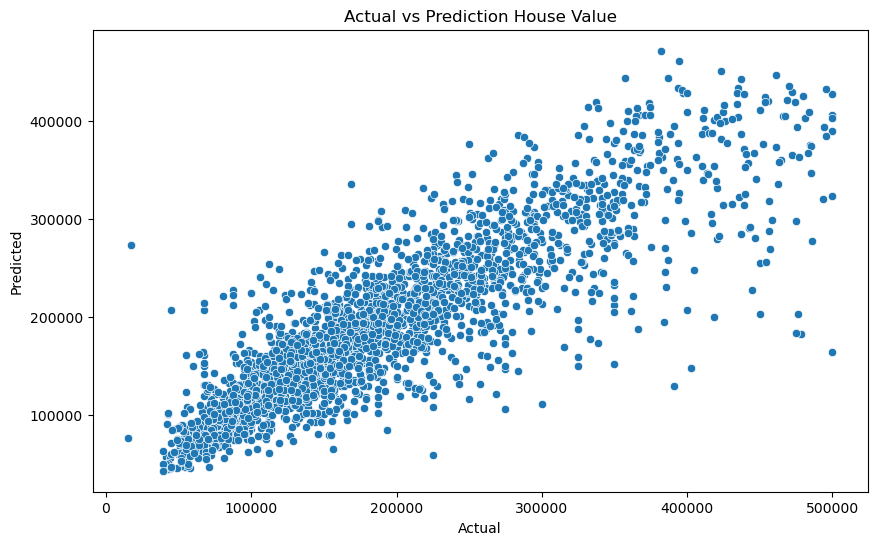

In [152]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuned)
plt.title("Actual vs Prediction House Value")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

The scatterplot shows that the actual and predicted data points are forming a linear pattern, though there are still some errors where the predicted values are not accurate compared to the actual values. However, with a MAPE value of 20%, this model falls into the "good forecasting model" category<sup>1, 2</sup>.

<sub>1. Nabillah, I., dan Ranggadara, I. (2020). Mean Absolute Percentage Error untuk Evaluasi Hasil Prediksi Komoditas Laut. Journal of Information System, 5(2), 250-255.  
2. Taylor, M.(2022). Mean Absolute Percentage Error. Vexpower. https://www.vexpower.com/brief/mean-absolute-percentage-error.</sub>

## Feature Importance

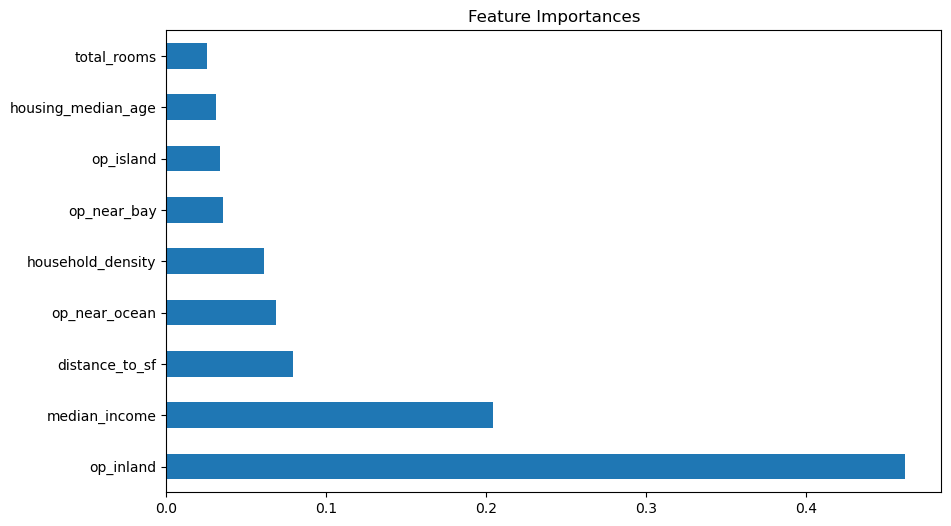

In [155]:
feature_imp = pd.Series(xgb_tuned["model"].feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_imp.plot(kind="barh", title="Feature Importances")
plt.show()

Based on the graph for the XGBoost model, the following conclusions can be drawn:
1. The op_inland feature is the most important factor for predicting median_house_value. This suggests that the location of a house on land has a significant pricing pattern compared to other locations.
2. The median_income feature is the second most important factor, which is expected, as income is typically linked to an individual's purchasing power.
3. The distance_to_sf feature is the third most important, indicating that the distance to the center of San Francisco influences house prices.

# Conclusion

Based on the model, the following insights can be drawn:
1. The most influential feature on median_house_value is op_inland, which represents the category of the ocean_proximity location. Additionally, median_income and distance_to_sf also have high influence on the model.
2. According to the feature correlation:
   - op_inland is negatively correlated with the target median_house_value, meaning that houses located inland (away from the coast) are predicted to have lower prices.
   - median_income is positively correlated with the target, meaning that as the income of residents increases, house prices are expected to rise.
   - distance_to_sf is negatively correlated with the target, indicating that as the distance to San Francisco increases, house prices tend to decrease, though not significantly.
3. The evaluation metrics used for the model are R-Squared, MAE, RMSE, and MAPE:
   - R-Squared: The model has a good ability to explain 75.5% of the variation in the target data.
   - MAE: The average absolute difference between predicted and actual values is 33,247.99.
   - RMSE: The model shows outliers in predictions, as the RMSE value is higher than the MAE, at 48,126.31.
   - MAPE: The average percentage of absolute error between predictions and actual values is 20.26%.
4. The model for predicting house prices in California has limitations and is only recommended for use within the range of minimum and maximum values for each feature and target.

# Recommendation

Here are some suggestions that may be useful for developing a better model:
1. Add potential features that could influence house prices, such as land and building area, house type, number of floors, or building condition. External features may also have an impact, such as house taxes or proximity to important facilities (e.g., public transportation, hospitals, shopping centers).
2. Update the data with more current information to improve prediction accuracy, considering that the data used in the model is from the 1990 census, which may no longer be relevant to the current conditions.
3. Experiment with other feature engineering techniques, such as binning the features housing_median_age, population, households, or median_income, as the range of data allows for categorization.
4. Experiment with other modeling algorithms that have not been tested in this study.

# Saving Model

In [162]:
import pickle

In [163]:
with open("xbg_tuned_model.pkl", "wb") as file:
    pickle.dump(xgb_tuned, file)

In [164]:
with open("xbg_tuned_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

loaded_model.predict(x_test)

array([329926.66, 189648.34, 234491.12, ..., 115235.63, 298986.38,
       209000.67], dtype=float32)

# Usage Test

In [166]:
x_dummy = pd.DataFrame({
    "op_inland": [0],
    "op_island": [0],
    "op_near_bay": [0],
    "op_near_ocean": [1],
    "housing_median_age": [15],
    "total_rooms": [1599],
    "median_income": [3],
    "distance_to_sf": [300],
    "household_density": [140]
})

x_dummy

,op_inland,op_island,op_near_bay,op_near_ocean,housing_median_age,total_rooms,median_income,distance_to_sf,household_density
0,0,0,0,1,15,1599,3,300,140


In [167]:
y_dummy_pred = loaded_model.predict(x_dummy)

print("Dummy house price prediction: ", y_dummy_pred[0])

Dummy house price prediction:  174779.45
